In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd

In [ ]:
#importar csv
dados = pd.read_csv('dados_1997_2011_paises_csv.csv',
                            sep= ';',
                            encoding= 'latin1',
                            decimal= ',')
dados

In [ ]:
type(dados)

In [ ]:
#ver os tipos de dados no csv
dados.dtypes

#Comandos basicos pandas dataframes


In [ ]:
#ver numero de linhas especificos na tabela do comeco p baixo
dados.head(2)

#ver numero de linhas especificos na tabela do final p cima
dados.tail(2)

In [ ]:
dados.tail(10)

In [ ]:
#nome das colunas
dados.columns

In [ ]:
#trocar nome da coluna
dados.rename(columns = {'populacao':'pop', 'globalizacao_indice':'glob_indice'}).columns

#ASSOCIAR TROCA DE NOMES EM COLUNAS FAZ A TABELA ANTIGA SUMIR, ENTAO NAO SALVAR COM O MESMO NOME

In [ ]:
#associando a  troca de nomes a um objeto diferente para nao perder a tabela antiga
dados2 = dados.rename(columns = {'populacao':'pop', 'globalizacao_indice':'glob_indice'})

#ver as colunas de algo específico
dados2.columns

In [ ]:
#filtrar 1 coluna

dados2['pais']

In [ ]:
#filtrar mais de 1 coluna - forma 1, head para ver um numero especifico de colunas de cima para baixo
dados2[['pais', 'ano', 'idh']].head(90)

In [ ]:
#filtrar mais de 1 coluna - forma 2, tail para ver um numero especifico de colunas de baixo para cima
cols = ['ano', 'pais', 'idh']

dados2[cols].tail(10)

In [ ]:
#ver uma ou mais colunas especificas
dados.iloc[50:51]

#comecar de um numero especifico e ver de oito em oito, nesse caso
dados.iloc[4::8]

In [ ]:
#ver coluna especifica de um indice especifico

dados.iloc[4:5, 5:6]

In [ ]:
#criar modificar uma coluna, como por ex multiplicar algum valor ou sla
dados2['idh_mult'] = dados2['idh'] * 100

dados2[['idh_mult', 'idh']]


In [ ]:
#modificar uma coluna, como por ex multiplicar algum valor ou sla tambem funciona com o objeto la0

dados2[cols] * 100

In [ ]:
#ver nova coluna ao lado de uma ou mais colunas especificas
dados2[['idh_mult', 'pais']]

dados2.head(2)

In [ ]:
#como aplicar umas mesma funcao em mais de uma coluna
dados2[['pop', 'pib']].apply(lambda x: np.log(x)).head(2)


In [ ]:
#atribuindo a um objeto
dados2[['log_pop','log_pib']] = dados2[['pop', 'pib']].apply(lambda x:np.log(x))
dados2.head(2)

#filtros


In [ ]:
#filtrar coluna texto - forma 1
dados2[dados2['pais'] == 'Brasil']

In [ ]:
#listando os indices de uma coluna especifica, pra saber como se escreve, quais sao sla
#quantos paises existem no data set
dados2['pais'].unique()

In [ ]:
#quantos indices tem numa determinada coluna
#quantos paises diferentes
len(dados2['pais'].unique())

In [ ]:
#ver determinados indices que contenham certas strings
dados2[dados2['pais'].str.contains('Br')]

dados2[dados2['pais'].str.contains('A')]

In [ ]:
#filtrar numeros especificos em colunas
dados2[dados2['idh'] > 0.9]

#filtrar numeros especificos em colunas para ver extamente um numero
dados2[dados2['idh'] == 0.6]

In [ ]:
#filtrar lista de valores
lista_paises = ['Brasil', 'Alemanha', 'China']

dados2[dados['pais'].isin(lista_paises)]

In [ ]:
#filtrar lista excluindo alguns indices(excluindo da filtragem, nao permanentemente)
dados2[~dados['pais'].isin(lista_paises)]

In [ ]:
#filtrar lista excluindo alguns indices(excluindo da filtragem, nao permanentemente)
#ver colunas especificas
dados2[~dados['pais'].isin(lista_paises)][['pais', 'idh']]

dados2[dados['pais'].isin(lista_paises)][['pais', 'pop']]

In [ ]:
#filtrar mais de uma coluna, sempre que quiser add mais um parametro, colocar & ()
dados2[(dados2['pais'].isin(lista_paises)) & (dados2['ano'] >= 2007)]


In [ ]:
#ordenar valores de forma crescente
dados2.sort_values('idh', ascending = True)

#ordenar valores de forma decrescente
dados2.sort_values('idh', ascending = False)

#ordenar valores de forma decrescente, ver um especifico, de cima para baixo,
#de baixo para cima etc fuça ai carai
dados2.sort_values('idh', ascending = True).iloc[4:5] #um especifico
dados2.sort_values('idh', ascending = True).tail(3) #de baixo pra cima
dados2.sort_values('idh', ascending = True).head(3) #cima pra baixo

#Agregar valores

In [ ]:
#forma direta
#soma da população
dados2['pop'].sum()

In [ ]:
#agregar por pais
#media do idh dos paises #pra ver a mediana é median
dados2.groupby('pais')['idh'].mean()

In [ ]:
#media da população
dados2.groupby('pais')['pop'].mean()

In [ ]:
#agregar colunas diferentes

#aq faz uma funcao numa ou mais colunas e agrega a outra

#nesse caso eu fiz a soma das populações dos diferentes anos
#e a media dos idh dos paises em diferentes anos e atribui a coluna de paises
dados2.groupby('pais') \
      .agg(total_pop = pd.NamedAgg('pop', 'sum'),
           media_idh = pd.NamedAgg('idh', 'mean'))

#Graficos
- grafico de linhas

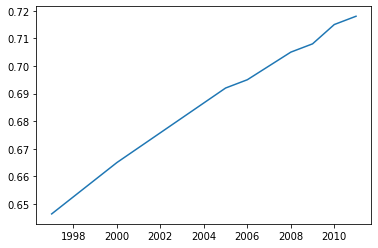

In [ ]:
#grafico de linhas
dados_brasil = dados2[dados2['pais'] == 'Brasil']

#grafico referent ao idh durante os anos
plt.plot(dados_brasil['ano'], dados_brasil['idh'])

#Grafico de barras

<BarContainer object of 15 artists>

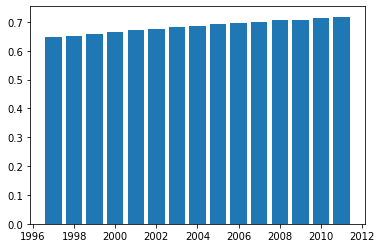

In [ ]:
#grafico referent ao idh durante os anos
plt.bar(dados_brasil['ano'], dados_brasil['idh'])